<a href="https://colab.research.google.com/github/ms624atyale/Python_Basics/blob/main/29_STwordsPOSCollocationConcordanceWC_ModifiedfromHSNam95_Junkyuhufs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization, Stopwords, POS with Pandas, Collocation, Concordance, Word frequency, & Word clouds, 

🆘 👀 What is PunktSentenceTokenizer?

For more information read the original article
In NLTK, PUNKT is an unsupervised trainable model, which means it can be trained on unlabeled data (Data that has not been tagged with information identifying its characteristics, properties, or categories is referred to as unlabeled data.)

It generates a list of sentences from a text by developing a model for words that start sentences, prepositional phrases, and abbreviations using an unsupervised technique. Without first being put to use, it has to be trained on a sizable amount of plaintext in the intended language.

nltk.sent_tokenize를 사용할 경우, punkt 모델을 활용하여 sentence tokenization을 진행하게 된다. punkt 또한 문장 구조를 학습한 일종의 모델로, 어떤 것이 약어에 쓰이는 "."이고(Ex : Ph.D.), 어떤 것이 마침표인지 학습이 되어있다. 문장을 기본적으로 마침표를 기준으로 나누되, Ph.D., Saint., Professor., 와 같은 약어(Abbreviation)는 Known abbreviation으로 학습하여 한 단어로 취급하는 방식이다. 하지만 punkt model이 모든 약어를 학습하지 못했다보니, Vol. 13, Apr. 13 과 같은 표현 및 U.S. Pat. No. 134 과 같은 복잡한 약어는 Known abbreviation이 아니여서 모두 나눠져버린다.

In [ ]:
import nltk #🍄 package or module? 

nltk.download('gutenberg') #'gutenberg는 사전인가? 확인 필요
text = nltk.corpus.gutenberg.raw('austen-emma.txt')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

tkwords = word_tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


👀 **WordNet** is just another NLTK corpus reader, and can be imported like this:

[For more information, you can read the original article](https://www.nltk.org/howto/wordnet.html)
> * from nltk.corpus import wordnet as wn
>
>Look up a word using synsets(); this function has an optional pos argument which lets you constrain the part of speech of the word:
>
> wn.synsets('dog', pos=wn.VERB)

> [Synset('chase.v.01')]


In [ ]:
from nltk.stem import WordNetLemmatizer #굴절을 복원하여 base기저부분(e.g., root & stem)을 추출 함수 
nltk.download('wordnet')

from nltk.corpus import wordnet #as wn
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in tkwords]

In [ ]:
#@markdown ##🚸 <font color = 'blue'> **Reroute for fun**
from nltk.stem import WordNetLemmatizer #굴절을 복원하여 base기저부분(e.g., root & stem)을 추출 함수 
nltk.download('wordnet')

from nltk.corpus import wordnet #as wn
lemmatizer = WordNetLemmatizer()
for w in tkwords:
  lemmatizer.lemmatize(w) 

print(tkwords)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an'

##**Stopwords** 불용어

[For more information, read the original article](https://pythonspot.com/nltk-stop-words/)

* Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.

* Stop words are common words like ‘the’, ‘and’, ‘I’, etc. that are very frequent in text, and so don’t convey insights into the specific topic of a document. We can remove these stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.

* Text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words.

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords') #필요한 모듈??라서 따로 다운로드 함.
fltdwords = [w for w in tkwords if not w in stopwords.words('english')] #🍄 codeline 해석 못함X. words 는 변수인데, 왜 함수()처럼 쓰이지? 
print(fltdwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'rich', ',', 'comfortable', 'home', 'happy', 'disposition', ',', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', ',', 'indulgent', 'father', ';', ',', 'consequence', 'sister', "'s", 'marriage', ',', 'mistress', 'house', 'early', 'period', '.', 'Her', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', ';', 'place', 'supplied', 'excellent', 'woman', 'governess', ',', 'fallen', 'little', 'short', 'mother', 'affection', '.', 'Sixteen', 'years', 'Miss', 'Taylor', 'Mr.', 'Woodhouse', "'s", 'family', ',', 'less', 'governess', 'friend', ',', 'fond', 'daughters', ',', 'particularly', 'Emma', '.', 'Between', '_them_', 'intimacy', 'sisters', '.', 'Even', 'Miss', 'Taylor', 'ceased', 'hold', 'nomi

### <font color = 'blue'> **Extracting POS from tokenized_lemmatized_filtered_wordlist (Part of speech: Grammatical cagetories) & Drawing Tables**

In [ ]:
#@markdown Import/Install relevant packages 
import spacy

nlp = spacy.load("en_core_web_sm")
     

In [ ]:
## Preprocessing
#text = "The rain in Spain falls mainly on the plain."
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
    
df
     

Streaming output truncated to the last 5000 lines.
have have AUX True
always always ADV True
had have AUX True
reason reason NOUN False
to to PART True
believe believe VERB False

 
 SPACE False
as as ADV True
much much ADJ True
in in ADP True
love love NOUN False
with with ADP True
her she PRON True
as as ADP True
ever ever ADV True
, , PUNCT False
) ) PUNCT False
to to PART True
get get AUX True
acquainted acquaint VERB False
with with ADP True
her she PRON True
. . PUNCT False

 
 SPACE False
I I PRON True
have have AUX True
often often ADV True
talked talk VERB False
to to ADP True
her she PRON True
a a DET True
good good ADJ False
deal deal NOUN False
. . PUNCT False
    SPACE False
You you PRON True
must must AUX True
have have AUX True
seen see VERB False
that that SCONJ True

 
 SPACE False
I I PRON True
did do VERB True
. . PUNCT False
    SPACE False
Sometimes sometimes ADV True
, , PUNCT False
indeed indeed ADV True
, , PUNCT False
I I PRON True
have have AUX True
thought th

,text,lemma,POS,explain,stopword
0,[,[,X,other,False
1,Emma,Emma,PROPN,proper noun,False
2,by,by,ADP,adposition,True
3,Jane,Jane,PROPN,proper noun,False
4,Austen,Austen,PROPN,proper noun,False
...,...,...,...,...,...
206885,union,union,NOUN,noun,False
206886,.,.,PUNCT,punctuation,False
206887,\n\n\n,\n\n\n,SPACE,space,False
206888,FINIS,FINIS,PROPN,proper noun,False


### <font color = 'red'> **Collocation & Concordance** 

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt') #Package.Module.gutenberg자료.raw()함수
words = retokenize.tokenize(text)#?? [\w]+ RE을 적용한 결과를 할당한 retokenize 변수에 위의 text변수를 토큰화하는 함수 사용 

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt') #Package.Module.gutenberg자료.raw()함수

from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
#@markdown "The rain in Spain falls mainly on the plain." 전처리
text = "The rain in Spain falls mainly on the plain."
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
    
df
     


In [ ]:
nltk.Text(words).collocations()

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


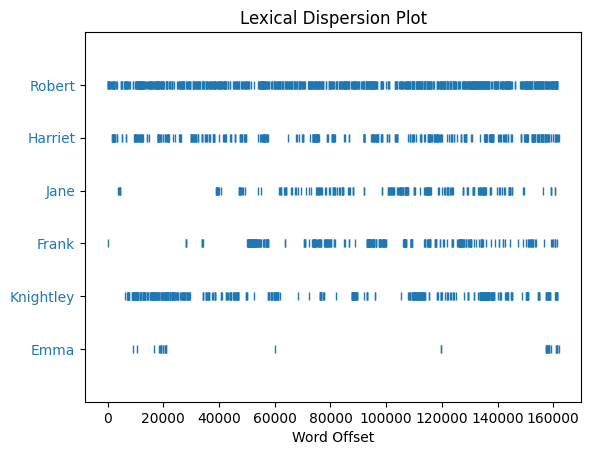

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [ ]:
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [ ]:
nltk.Text(words).common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


### Frequency distribution, Frequency plot

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

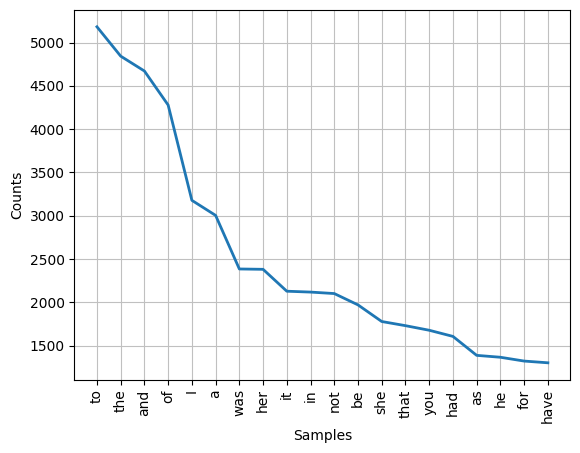

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
nltk.Text(words).plot(20)

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [ ]:
len(nltk.corpus.words.words('en'))

235886

### Regular expression

In [ ]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything']


### Extract information (pos tag, named entity)

In [ ]:
import nltk
nltk.download('punkt')

sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

'\nPOS tag list:\n\nCC\tcoordinating conjunction\nCD\tcardinal digit\nDT\tdeterminer\nEX\texistential there (like: "there is" ... think of it like "there exists")\nFW\tforeign word\nIN\tpreposition/subordinating conjunction\nJJ\tadjective\t\'big\'\nJJR\tadjective, comparative\t\'bigger\'\nJJS\tadjective, superlative\t\'biggest\'\nLS\tlist marker\t1)\nMD\tmodal\tcould, will\nNN\tnoun, singular \'desk\'\nNNS\tnoun plural\t\'desks\'\nNNP\tproper noun, singular\t\'Harrison\'\nNNPS\tproper noun, plural\t\'Americans\'\nPDT\tpredeterminer\t\'all the kids\'\nPOS\tpossessive ending\tparent\'s\nPRP\tpersonal pronoun\tI, he, she\nPRP$\tpossessive pronoun\tmy, his, hers\nRB\tadverb\tvery, silently,\nRBR\tadverb, comparative\tbetter\nRBS\tadverb, superlative\tbest\nRP\tparticle\tgive up\nTO\tto\tgo \'to\' the store.\nUH\tinterjection\terrrrrrrrm\nVB\tverb, base form\ttake\nVBD\tverb, past tense\ttook\nVBG\tverb, gerund/present participle\ttaking\nVBN\tverb, past participle\ttaken\nVBP\tverb, sing. 

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


### Wordcloud

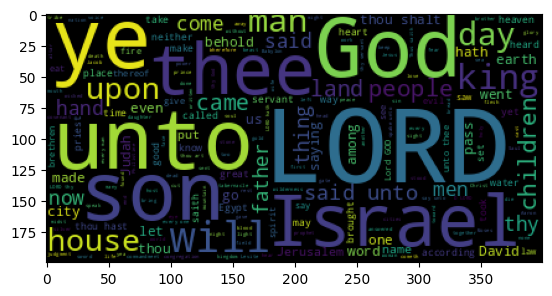

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

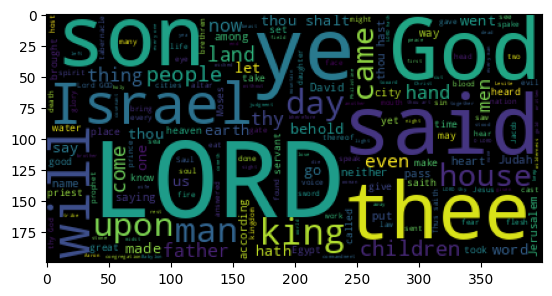

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)